# Data Analysis and Interpretation

### Show all files

In [3]:
import os

path = '../Scenario 3 - all change/data_base/Scenario-03/'
dirs = os.listdir(path)
dirs

['Scenario-03_average_70',
 'Scenario-03_zero_10',
 'Scenario-03_median_70',
 'Scenario-03_average_30',
 'Scenario-03_median_10',
 'Scenario-03_average_10',
 'Scenario-03_median_30',
 'Scenario-03_median_50',
 'Scenario-03_zero_50',
 'Scenario-03_zero_70',
 'Scenario-03_zero_30',
 'Scenario-03_average_50']

In [4]:
import numpy as np
import pandas as pd

data = {}
data['tipo'] = []
data['percentual'] = []
data['F1'] = []
data['Pearson_Correlation'] = []
data['RMSE'] = []
data['pesos'] = []
data['kernel_names'] = []

for dir in dirs:
    # print('DIR', dir)
    mean_f1 = []
    mean_pearsonCorrelation = []
    mean_RMSE = []
    weights = []
    for iter in os.listdir(path+dir):
        # print('ITER', iter)
        f1_file = path+dir+'/'+iter+'/F1_score.txt'
        f1 = np.loadtxt(f1_file)
        mean_f1.append(f1.mean())

        pearsonCorrelation_file = path+dir+'/'+iter+'/Pearson_correlation.txt'
        pearsonCorrelation = np.loadtxt(pearsonCorrelation_file)
        mean_pearsonCorrelation.append(pearsonCorrelation.mean())

        RMSE_file = path+dir+'/'+iter+'/RMSE.txt'
        RMSE = np.loadtxt(RMSE_file)
        mean_RMSE.append(RMSE.mean())

        pesos        = np.loadtxt(path+dir+'/'+iter+'/pairwise_kernel_weights.txt').mean(axis=0)
        weights.append(pesos)
        kernel_names = open(path+dir+'/'+iter+'/pairwise_kernel_names.txt','r').read().split('\t')
        partes = dir.split('_')

    data['tipo'].append(partes[1])
    data['percentual'].append(int(partes[2]))
    data['F1'].append(np.mean(mean_f1))
    data['Pearson_Correlation'].append(np.mean(mean_pearsonCorrelation))
    data['RMSE'].append(np.mean(mean_RMSE))
    data['pesos'].append(np.mean(weights, axis=0))
    data['kernel_names'].append(kernel_names)


df = pd.DataFrame(data=data)
df

,tipo,percentual,F1,Pearson_Correlation,RMSE,pesos,kernel_names
0,average,70,0.579875,0.749258,2.305535,"[1.9133301043404116e-09, 1.1860220459384222e-0...",[Modified_average_70_Kd_PubChem.txt_KRONECKER_...
1,zero,10,0.550972,0.715022,2.503264,"[-2.1805978156574324e-09, 8.223579908914936e-0...",[Modified_zero_10_Kd_PubChem.txt_KRONECKER_Mod...
2,median,70,0.588694,0.764835,2.221370,"[2.8710243880506185e-10, 1.2581962717059267e-0...",[Modified_median_70_Kd_PubChem.txt_KRONECKER_M...
3,average,30,0.593713,0.769131,2.207264,"[1.1090985110776788e-09, 6.566769476237578e-09...",[Modified_average_30_Kd_PubChem.txt_KRONECKER_...
4,median,10,0.603812,0.790405,2.085613,"[-6.607625168993367e-10, -6.423626386361722e-1...",[Modified_median_10_Kd_PubChem.txt_KRONECKER_M...
5,average,10,0.599449,0.781158,2.134961,"[-6.119697960117947e-10, -6.773923628645899e-1...",[Modified_average_10_Kd_PubChem.txt_KRONECKER_...
6,median,30,0.593312,0.769816,2.199635,"[1.5806334247935368e-09, 2.98531875004523e-09,...",[Modified_median_30_Kd_PubChem.txt_KRONECKER_M...
7,median,50,0.581394,0.757179,2.270431,"[3.916667648008931e-09, 1.9683407501925052e-08...",[Modified_median_50_Kd_PubChem.txt_KRONECKER_M...
8,zero,50,0.499740,0.565537,3.558117,"[0.0009840937354764368, 0.0035398225503769534,...",[Modified_zero_50_Kd_PubChem.txt_KRONECKER_Mod...
9,zero,70,0.478331,0.463281,4.609841,"[1.517349778407336e-07, 0.0013806195640030546,...",[Modified_zero_70_Kd_PubChem.txt_KRONECKER_Mod...


### Analysis grouped by percent: 10%

In [5]:
df[df['percentual'] == 10]

,tipo,percentual,F1,Pearson_Correlation,RMSE,pesos,kernel_names
1,zero,10,0.550972,0.715022,2.503264,"[-2.1805978156574324e-09, 8.223579908914936e-0...",[Modified_zero_10_Kd_PubChem.txt_KRONECKER_Mod...
4,median,10,0.603812,0.790405,2.085613,"[-6.607625168993367e-10, -6.423626386361722e-1...",[Modified_median_10_Kd_PubChem.txt_KRONECKER_M...
5,average,10,0.599449,0.781158,2.134961,"[-6.119697960117947e-10, -6.773923628645899e-1...",[Modified_average_10_Kd_PubChem.txt_KRONECKER_...


### Analysis grouped by percent: 30%

In [6]:
df[df['percentual'] == 30]

,tipo,percentual,F1,Pearson_Correlation,RMSE,pesos,kernel_names
3,average,30,0.593713,0.769131,2.207264,"[1.1090985110776788e-09, 6.566769476237578e-09...",[Modified_average_30_Kd_PubChem.txt_KRONECKER_...
6,median,30,0.593312,0.769816,2.199635,"[1.5806334247935368e-09, 2.98531875004523e-09,...",[Modified_median_30_Kd_PubChem.txt_KRONECKER_M...
10,zero,30,0.530130,0.639928,3.008988,"[4.628116774265994e-08, 0.0007348337924921399,...",[Modified_zero_30_Kd_PubChem.txt_KRONECKER_Mod...


### Analysis grouped by percent: 50%

In [7]:
df[df['percentual'] == 50]

,tipo,percentual,F1,Pearson_Correlation,RMSE,pesos,kernel_names
7,median,50,0.581394,0.757179,2.270431,"[3.916667648008931e-09, 1.9683407501925052e-08...",[Modified_median_50_Kd_PubChem.txt_KRONECKER_M...
8,zero,50,0.499740,0.565537,3.558117,"[0.0009840937354764368, 0.0035398225503769534,...",[Modified_zero_50_Kd_PubChem.txt_KRONECKER_Mod...
11,average,50,0.592168,0.761037,2.250131,"[-3.3476193892258877e-10, 7.044754901268078e-0...",[Modified_average_50_Kd_PubChem.txt_KRONECKER_...


### Analysis grouped by percent: 70%

In [8]:
df[df['percentual'] == 70]

,tipo,percentual,F1,Pearson_Correlation,RMSE,pesos,kernel_names
0,average,70,0.579875,0.749258,2.305535,"[1.9133301043404116e-09, 1.1860220459384222e-0...",[Modified_average_70_Kd_PubChem.txt_KRONECKER_...
2,median,70,0.588694,0.764835,2.221370,"[2.8710243880506185e-10, 1.2581962717059267e-0...",[Modified_median_70_Kd_PubChem.txt_KRONECKER_M...
9,zero,70,0.478331,0.463281,4.609841,"[1.517349778407336e-07, 0.0013806195640030546,...",[Modified_zero_70_Kd_PubChem.txt_KRONECKER_Mod...


### Evaluation of the performance of the techniques in comparison with the F1 score

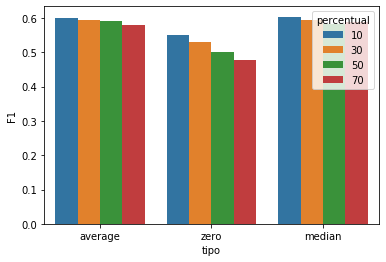

In [11]:
import seaborn as sns
sns.barplot(x='tipo', y='F1', data=df, hue='percentual')

### Evaluation of the performance of the techniques in comparison with the Pearson Correlation


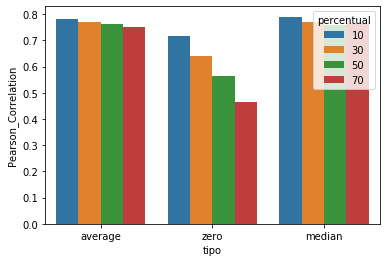

In [10]:
sns.barplot(x='tipo', y='Pearson_Correlation', data=df, hue='percentual')

### Evaluation of the performance of the techniques in comparison with the RMSE

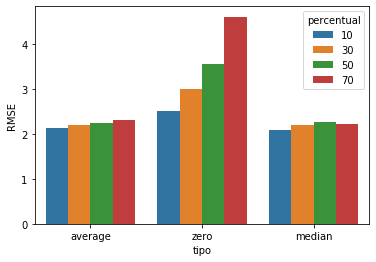

In [12]:
sns.barplot(x='tipo', y='RMSE', data=df, hue='percentual')

In [27]:
def plot_heatmap(dataframe, percentual=10, tipo='zero'):

    # testando com 10% e tipo=zero
    pesos = dataframe[(dataframe['percentual'] == percentual) \
                    & (dataframe['tipo'] == tipo)]['pesos'].values[0]
    kernel_names = dataframe[(dataframe['percentual'] == percentual) \
                           & (dataframe['tipo'] == tipo)]['kernel_names'].values[0]
    # assumindo que kernel_names nao muda em cada execucao
    kds = [kn.split('.txt')[0] for kn in kernel_names[:-1]]
    kcs = [kn.split('.txt')[1] for kn in kernel_names[:-1]]
    pesos = dataframe[(dataframe['percentual'] == 10) \
                    & (dataframe['tipo'] == 'zero')]['pesos'].values[0]

    df2 = pd.DataFrame(data={
        'kd': kds,
        'kc': kcs,
        'peso': pesos} )

    matrix = df2.groupby(['kd','kc'])['peso'].mean().unstack()

    sns.heatmap(matrix)



### Analysis of weights according to the combination of drug and protein files. Evaluated with: technique: zero; percentage: 10.

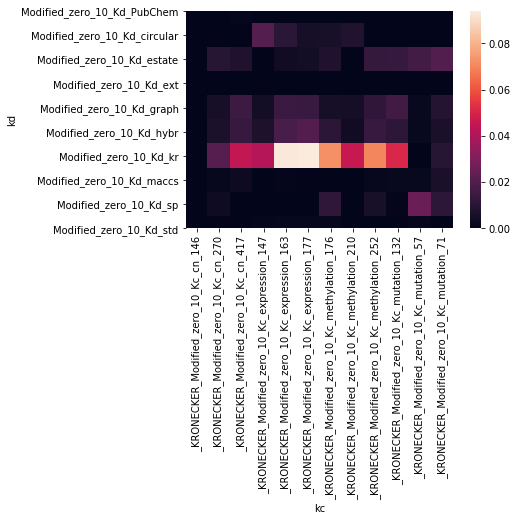

In [28]:
plot_heatmap(df, percentual=10, tipo='zero')

In [29]:
def plot_heatmap(dataframe, percentual=30, tipo='zero'):

    # testando com 30% e tipo=zero
    pesos = dataframe[(dataframe['percentual'] == percentual) \
                    & (dataframe['tipo'] == tipo)]['pesos'].values[0]
    kernel_names = dataframe[(dataframe['percentual'] == percentual) \
                           & (dataframe['tipo'] == tipo)]['kernel_names'].values[0]
    # assumindo que kernel_names nao muda em cada execucao
    kds = [kn.split('.txt')[0] for kn in kernel_names[:-1]]
    kcs = [kn.split('.txt')[1] for kn in kernel_names[:-1]]
    pesos = dataframe[(dataframe['percentual'] == 30) \
                    & (dataframe['tipo'] == 'zero')]['pesos'].values[0]

    df2 = pd.DataFrame(data={
        'kd': kds,
        'kc': kcs,
        'peso': pesos} )

    matrix = df2.groupby(['kd','kc'])['peso'].mean().unstack()

    sns.heatmap(matrix)

### Analysis of weights according to the combination of drug and protein files. Evaluated with: technique: zero; percentage: 30.


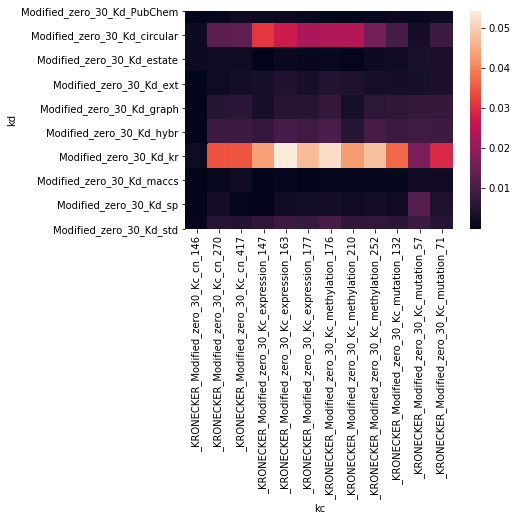

In [30]:
plot_heatmap(df, percentual=30, tipo='zero')

In [31]:
def plot_heatmap(dataframe, percentual=50, tipo='zero'):

    # testando com 50% e tipo=zero
    pesos = dataframe[(dataframe['percentual'] == percentual) \
                    & (dataframe['tipo'] == tipo)]['pesos'].values[0]
    kernel_names = dataframe[(dataframe['percentual'] == percentual) \
                           & (dataframe['tipo'] == tipo)]['kernel_names'].values[0]
    # assumindo que kernel_names nao muda em cada execucao
    kds = [kn.split('.txt')[0] for kn in kernel_names[:-1]]
    kcs = [kn.split('.txt')[1] for kn in kernel_names[:-1]]
    pesos = dataframe[(dataframe['percentual'] == 50) \
                    & (dataframe['tipo'] == 'zero')]['pesos'].values[0]

    df2 = pd.DataFrame(data={
        'kd': kds,
        'kc': kcs,
        'peso': pesos} )

    matrix = df2.groupby(['kd','kc'])['peso'].mean().unstack()

    sns.heatmap(matrix)

### Analysis of weights according to the combination of drug and protein files. Evaluated with: technique: zero; percentage: 50.

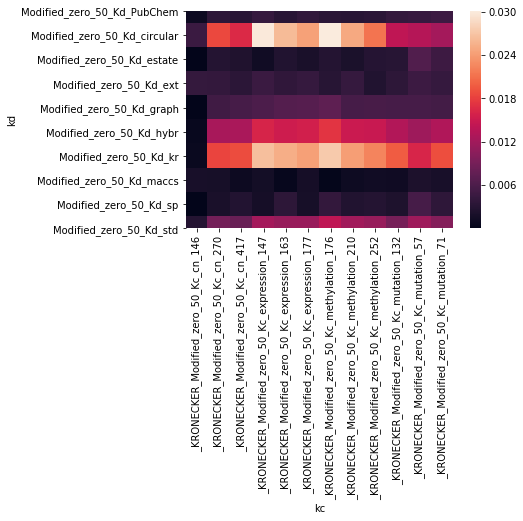

In [32]:
plot_heatmap(df, percentual=50, tipo='zero')

In [33]:
def plot_heatmap(dataframe, percentual=70, tipo='zero'):

    # testando com 70% e tipo=zero
    pesos = dataframe[(dataframe['percentual'] == percentual) \
                    & (dataframe['tipo'] == tipo)]['pesos'].values[0]
    kernel_names = dataframe[(dataframe['percentual'] == percentual) \
                           & (dataframe['tipo'] == tipo)]['kernel_names'].values[0]
    # assumindo que kernel_names nao muda em cada execucao
    kds = [kn.split('.txt')[0] for kn in kernel_names[:-1]]
    kcs = [kn.split('.txt')[1] for kn in kernel_names[:-1]]
    pesos = dataframe[(dataframe['percentual'] == 70) \
                    & (dataframe['tipo'] == 'zero')]['pesos'].values[0]

    df2 = pd.DataFrame(data={
        'kd': kds,
        'kc': kcs,
        'peso': pesos} )

    matrix = df2.groupby(['kd','kc'])['peso'].mean().unstack()

    sns.heatmap(matrix)

### Analysis of weights according to the combination of drug and protein files. Evaluated with: technique: zero; percentage: 70.

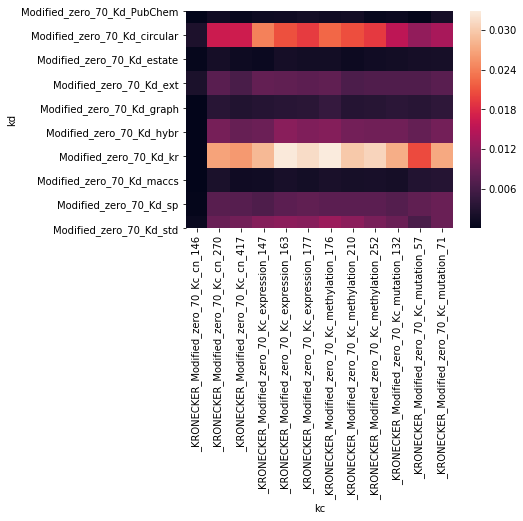

In [34]:
plot_heatmap(df, percentual=70, tipo='zero')

In [35]:
def plot_heatmap(dataframe, percentual=10, tipo='average'):

    # testando com 10% e tipo=average
    pesos = dataframe[(dataframe['percentual'] == percentual) \
                    & (dataframe['tipo'] == tipo)]['pesos'].values[0]
    kernel_names = dataframe[(dataframe['percentual'] == percentual) \
                           & (dataframe['tipo'] == tipo)]['kernel_names'].values[0]
    # assumindo que kernel_names nao muda em cada execucao
    kds = [kn.split('.txt')[0] for kn in kernel_names[:-1]]
    kcs = [kn.split('.txt')[1] for kn in kernel_names[:-1]]
    pesos = dataframe[(dataframe['percentual'] == 10) \
                    & (dataframe['tipo'] == 'average')]['pesos'].values[0]

    df2 = pd.DataFrame(data={
        'kd': kds,
        'kc': kcs,
        'peso': pesos} )

    matrix = df2.groupby(['kd','kc'])['peso'].mean().unstack()

    sns.heatmap(matrix)

### Analysis of weights according to the combination of drug and protein files. Evaluated with: technique: average; percentage: 10.

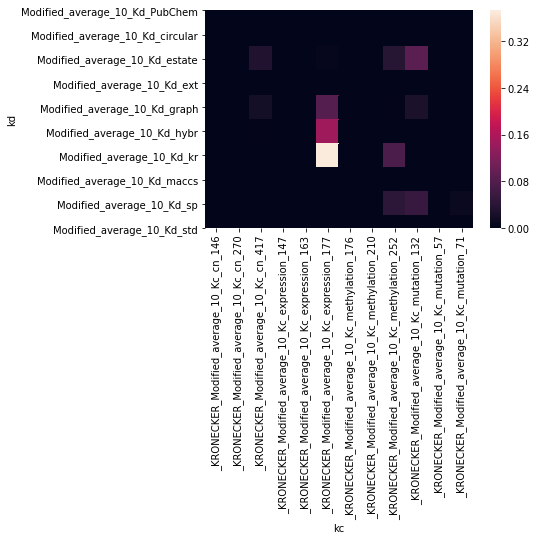

In [36]:
plot_heatmap(df, percentual=10, tipo='average')

In [37]:
def plot_heatmap(dataframe, percentual=30, tipo='average'):

    # testando com 30% e tipo=average
    pesos = dataframe[(dataframe['percentual'] == percentual) \
                    & (dataframe['tipo'] == tipo)]['pesos'].values[0]
    kernel_names = dataframe[(dataframe['percentual'] == percentual) \
                           & (dataframe['tipo'] == tipo)]['kernel_names'].values[0]
    # assumindo que kernel_names nao muda em cada execucao
    kds = [kn.split('.txt')[0] for kn in kernel_names[:-1]]
    kcs = [kn.split('.txt')[1] for kn in kernel_names[:-1]]
    pesos = dataframe[(dataframe['percentual'] == 30) \
                    & (dataframe['tipo'] == 'average')]['pesos'].values[0]

    df2 = pd.DataFrame(data={
        'kd': kds,
        'kc': kcs,
        'peso': pesos} )

    matrix = df2.groupby(['kd','kc'])['peso'].mean().unstack()

    sns.heatmap(matrix)

### Analysis of weights according to the combination of drug and protein files. Evaluated with: technique: average; percentage: 30.

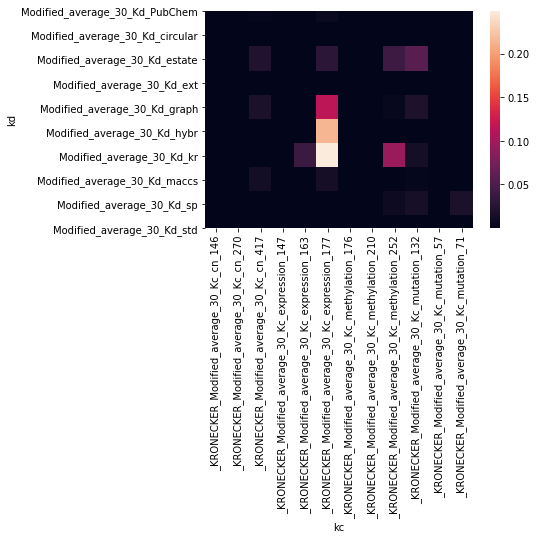

In [38]:
plot_heatmap(df, percentual=30, tipo='average')

In [39]:
def plot_heatmap(dataframe, percentual=50, tipo='average'):

    # testando com 50% e tipo=average
    pesos = dataframe[(dataframe['percentual'] == percentual) \
                    & (dataframe['tipo'] == tipo)]['pesos'].values[0]
    kernel_names = dataframe[(dataframe['percentual'] == percentual) \
                           & (dataframe['tipo'] == tipo)]['kernel_names'].values[0]
    # assumindo que kernel_names nao muda em cada execucao
    kds = [kn.split('.txt')[0] for kn in kernel_names[:-1]]
    kcs = [kn.split('.txt')[1] for kn in kernel_names[:-1]]
    pesos = dataframe[(dataframe['percentual'] == 50) \
                    & (dataframe['tipo'] == 'average')]['pesos'].values[0]

    df2 = pd.DataFrame(data={
        'kd': kds,
        'kc': kcs,
        'peso': pesos} )

    matrix = df2.groupby(['kd','kc'])['peso'].mean().unstack()

    sns.heatmap(matrix)

### Analysis of weights according to the combination of drug and protein files. Evaluated with: technique: average; percentage: 50.

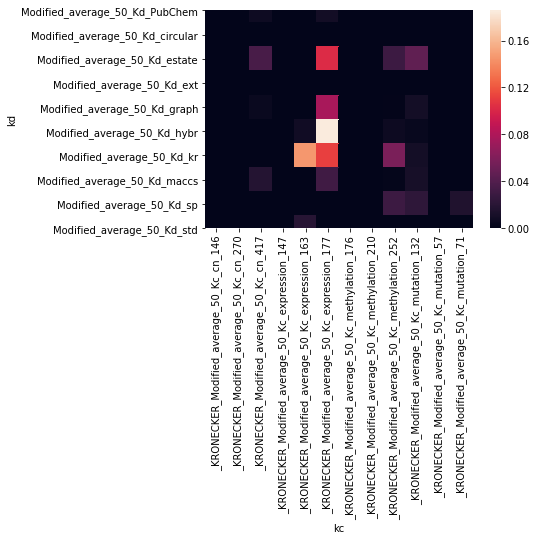

In [40]:
plot_heatmap(df, percentual=50, tipo='average')

In [41]:
def plot_heatmap(dataframe, percentual=70, tipo='average'):

    # testando com 70% e tipo=average
    pesos = dataframe[(dataframe['percentual'] == percentual) \
                    & (dataframe['tipo'] == tipo)]['pesos'].values[0]
    kernel_names = dataframe[(dataframe['percentual'] == percentual) \
                           & (dataframe['tipo'] == tipo)]['kernel_names'].values[0]
    # assumindo que kernel_names nao muda em cada execucao
    kds = [kn.split('.txt')[0] for kn in kernel_names[:-1]]
    kcs = [kn.split('.txt')[1] for kn in kernel_names[:-1]]
    pesos = dataframe[(dataframe['percentual'] == 70) \
                    & (dataframe['tipo'] == 'average')]['pesos'].values[0]

    df2 = pd.DataFrame(data={
        'kd': kds,
        'kc': kcs,
        'peso': pesos} )

    matrix = df2.groupby(['kd','kc'])['peso'].mean().unstack()

    sns.heatmap(matrix)

### Analysis of weights according to the combination of drug and protein files. Evaluated with: technique: average; percentage: 70.

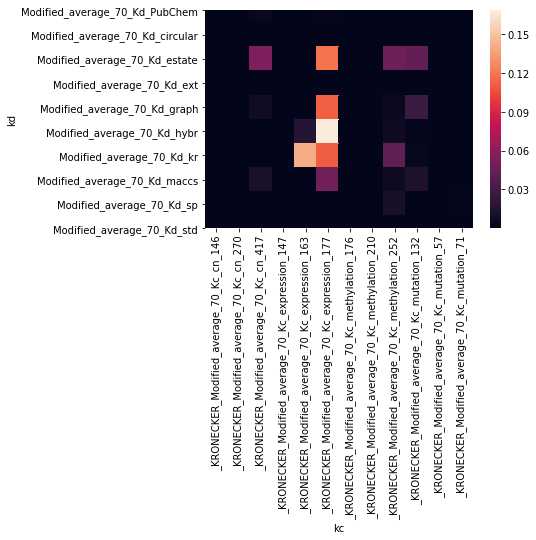

In [42]:
plot_heatmap(df, percentual=70, tipo='average')

In [43]:
def plot_heatmap(dataframe, percentual=10, tipo='median'):

    # testando com 10% e tipo=median
    pesos = dataframe[(dataframe['percentual'] == percentual) \
                    & (dataframe['tipo'] == tipo)]['pesos'].values[0]
    kernel_names = dataframe[(dataframe['percentual'] == percentual) \
                           & (dataframe['tipo'] == tipo)]['kernel_names'].values[0]
    # assumindo que kernel_names nao muda em cada execucao
    kds = [kn.split('.txt')[0] for kn in kernel_names[:-1]]
    kcs = [kn.split('.txt')[1] for kn in kernel_names[:-1]]
    pesos = dataframe[(dataframe['percentual'] == 10) \
                    & (dataframe['tipo'] == 'median')]['pesos'].values[0]

    df2 = pd.DataFrame(data={
        'kd': kds,
        'kc': kcs,
        'peso': pesos} )

    matrix = df2.groupby(['kd','kc'])['peso'].mean().unstack()

    sns.heatmap(matrix)

### Analysis of weights according to the combination of drug and protein files. Evaluated with: technique: median; percentage: 10.

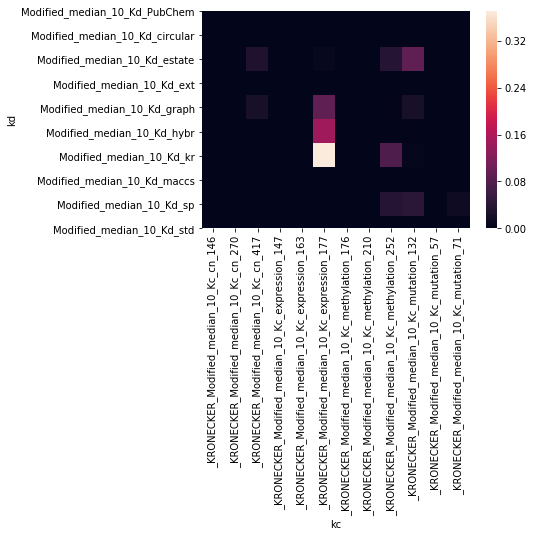

In [44]:
plot_heatmap(df, percentual=10, tipo='median')

In [45]:
def plot_heatmap(dataframe, percentual=30, tipo='median'):

    # testando com 30% e tipo=median
    pesos = dataframe[(dataframe['percentual'] == percentual) \
                    & (dataframe['tipo'] == tipo)]['pesos'].values[0]
    kernel_names = dataframe[(dataframe['percentual'] == percentual) \
                           & (dataframe['tipo'] == tipo)]['kernel_names'].values[0]
    # assumindo que kernel_names nao muda em cada execucao
    kds = [kn.split('.txt')[0] for kn in kernel_names[:-1]]
    kcs = [kn.split('.txt')[1] for kn in kernel_names[:-1]]
    pesos = dataframe[(dataframe['percentual'] == 30) \
                    & (dataframe['tipo'] == 'median')]['pesos'].values[0]

    df2 = pd.DataFrame(data={
        'kd': kds,
        'kc': kcs,
        'peso': pesos} )

    matrix = df2.groupby(['kd','kc'])['peso'].mean().unstack()

    sns.heatmap(matrix)

### Analysis of weights according to the combination of drug and protein files. Evaluated with: technique: median; percentage: 30.

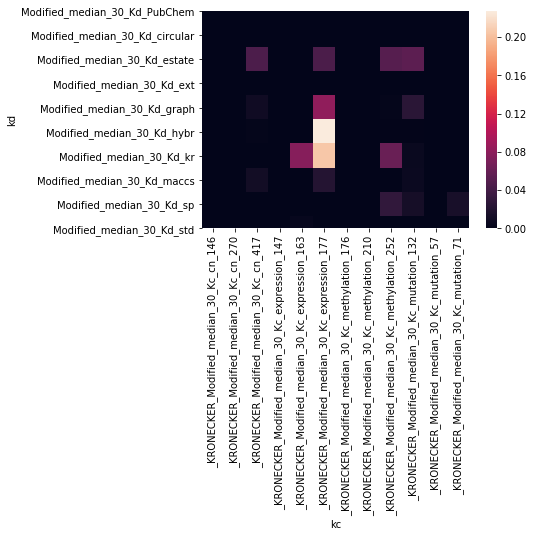

In [46]:
plot_heatmap(df, percentual=30, tipo='median')

In [47]:
def plot_heatmap(dataframe, percentual=50, tipo='median'):

    # testando com 50% e tipo=median
    pesos = dataframe[(dataframe['percentual'] == percentual) \
                    & (dataframe['tipo'] == tipo)]['pesos'].values[0]
    kernel_names = dataframe[(dataframe['percentual'] == percentual) \
                           & (dataframe['tipo'] == tipo)]['kernel_names'].values[0]
    # assumindo que kernel_names nao muda em cada execucao
    kds = [kn.split('.txt')[0] for kn in kernel_names[:-1]]
    kcs = [kn.split('.txt')[1] for kn in kernel_names[:-1]]
    pesos = dataframe[(dataframe['percentual'] == 50) \
                    & (dataframe['tipo'] == 'median')]['pesos'].values[0]

    df2 = pd.DataFrame(data={
        'kd': kds,
        'kc': kcs,
        'peso': pesos} )

    matrix = df2.groupby(['kd','kc'])['peso'].mean().unstack()

    sns.heatmap(matrix)

### Analysis of weights according to the combination of drug and protein files. Evaluated with: technique: median; percentage: 50.

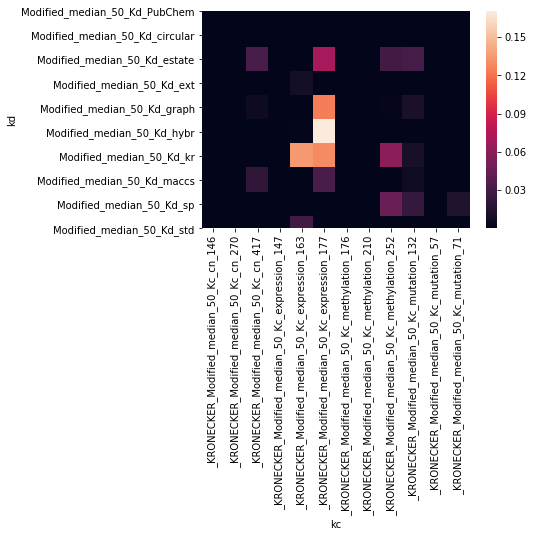

In [48]:
plot_heatmap(df, percentual=50, tipo='median')

In [49]:
def plot_heatmap(dataframe, percentual=70, tipo='median'):

    # testando com 70% e tipo=median
    pesos = dataframe[(dataframe['percentual'] == percentual) \
                    & (dataframe['tipo'] == tipo)]['pesos'].values[0]
    kernel_names = dataframe[(dataframe['percentual'] == percentual) \
                           & (dataframe['tipo'] == tipo)]['kernel_names'].values[0]
    # assumindo que kernel_names nao muda em cada execucao
    kds = [kn.split('.txt')[0] for kn in kernel_names[:-1]]
    kcs = [kn.split('.txt')[1] for kn in kernel_names[:-1]]
    pesos = dataframe[(dataframe['percentual'] == 70) \
                    & (dataframe['tipo'] == 'median')]['pesos'].values[0]

    df2 = pd.DataFrame(data={
        'kd': kds,
        'kc': kcs,
        'peso': pesos} )

    matrix = df2.groupby(['kd','kc'])['peso'].mean().unstack()

    sns.heatmap(matrix)

### Analysis of weights according to the combination of drug and protein files. Evaluated with: technique: median; percentage: 70.

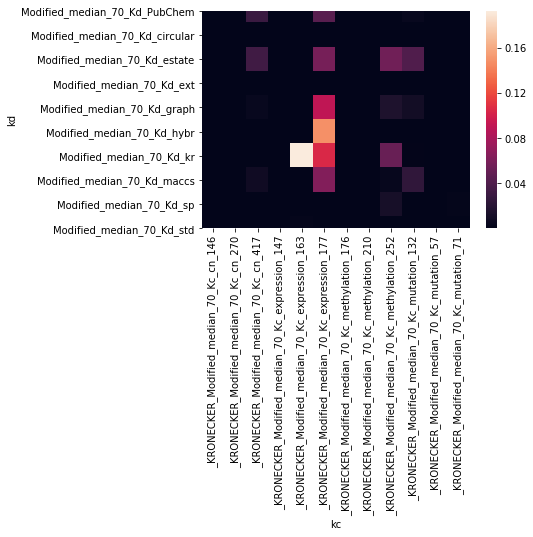

In [50]:
plot_heatmap(df, percentual=70, tipo='median')